## Gerekli kütüphaneler:
Daha önce eğitilmiş olan modelin değerlendirilmesi için gerekli kütüphaneler içe aktarılır. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random

## Konfigürasyonlar ve model yükleme:
İlgili veri seti üzerinde eğitilen ve CNN mimarisine ait olan model yüklenir.

In [ ]:
image_size = (256, 256)
batch_size = 16
data_directory = "../data/aerial_landscapes"

model = load_model("../models/aerial_landscapes_cnn.h5")

## Test verisi (doğrulama altkümesi):
`ImageDataGenerator` kullanılarak doğrulama verisi hazırlanmıştır.

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

val_gen = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

class_labels = list(val_gen.class_indices.keys())

Found 1800 images belonging to 15 classes.


## Tahminlerin alınması:
Model doğrulama verisi üzerinde tahmin yapar.

In [6]:
# Gerçek ve tahmin edilen etiketler
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

c:\Users\Casper\Desktop\LandCoverClassifier\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step


## Karışıklık matrisi ve sınıflandırma raporu:
Modelin doğrulama verisindeki tahmin başarımı karışıklık matrisi ve sınıflandırma raporu şekilde değerlendirilmiştir

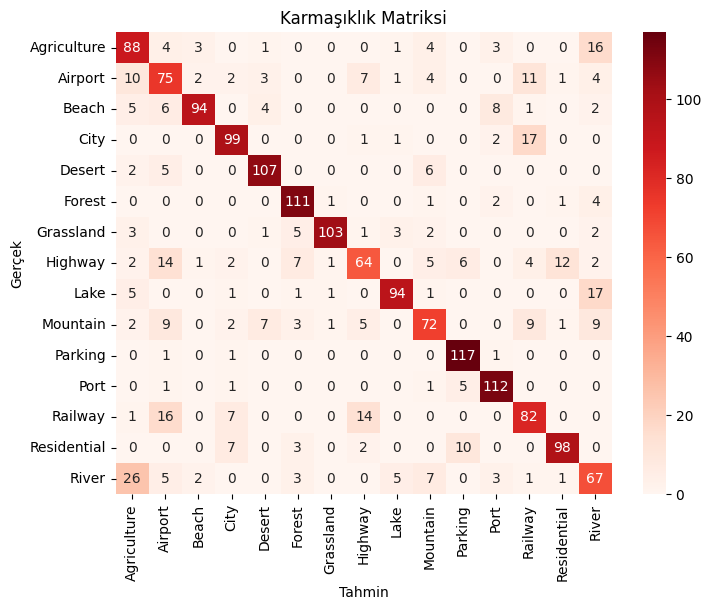

Sınıflandırma Raporu:
              precision    recall  f1-score   support

 Agriculture       0.61      0.73      0.67       120
     Airport       0.55      0.62      0.59       120
       Beach       0.92      0.78      0.85       120
        City       0.81      0.82      0.82       120
      Desert       0.87      0.89      0.88       120
      Forest       0.83      0.93      0.88       120
   Grassland       0.96      0.86      0.91       120
     Highway       0.68      0.53      0.60       120
        Lake       0.90      0.78      0.84       120
    Mountain       0.70      0.60      0.65       120
     Parking       0.85      0.97      0.91       120
        Port       0.85      0.93      0.89       120
     Railway       0.66      0.68      0.67       120
 Residential       0.86      0.82      0.84       120
       River       0.54      0.56      0.55       120

    accuracy                           0.77      1800
   macro avg       0.77      0.77      0.77      1800
weig

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Reds")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Karmaşıklık Matriksi")
plt.show()

print("Sınıflandırma Raporu:")
print(classification_report(y_true, y_pred, target_names=class_labels))

## Rastgele örnekler ile tahmin görselleri:
Doğrulama setinden `shuffle=True` parametresiyle elde edilen rastgele 6 örnek görselleştirilmiştir. Değerlendirme metriklerinde sıra önemli olduğundan `shuffle=False` kullanılmıştır; ancak görsel çeşitliliği sağlamak için bu hücrede ayrı bir `ImageDataGenerator` nesnesi ile `shuffle=True` kullanılmıştır.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


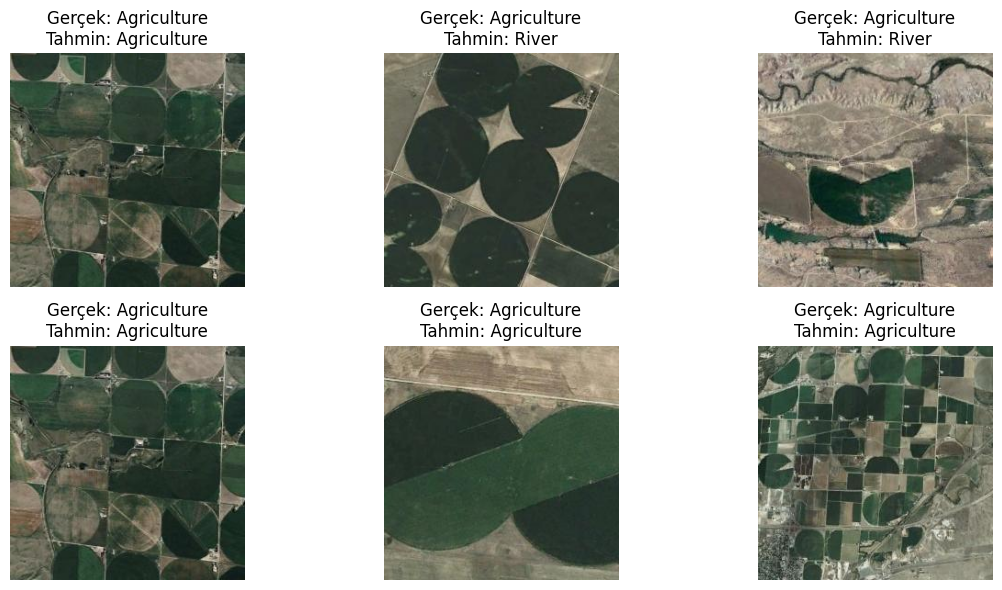

In [ ]:
# Görselleştirme için ayrı bir generator
vis_gen = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

val_images, val_labels = next(vis_gen)
preds = model.predict(val_images)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(val_labels, axis=1)

plt.figure(figsize=(12, 6))
for i in range(6):
    idx = random.randint(0, len(val_images)-1)
    plt.subplot(2, 3, i+1)
    plt.imshow(val_images[idx])
    plt.title(f"Gerçek: {class_labels[true_classes[idx]]}\nTahmin: {class_labels[pred_classes[idx]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
